In [1]:
import pandas as pd
import  numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('../data/forestfires.csv')

In [3]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
cols = ['month', 'day']

le = LabelEncoder()
df[cols] = df[cols].apply(le.fit_transform)

In [6]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Для задач регрессии с адекватном датасетом (не этим) следующий алгоритм:

In [7]:
# Разделяем набор данных на X - признаки, Y - целевая переменная
X = df.drop(['area'], axis=1)
Y = df.area

In [8]:
# Разделяем набор данных на тестовую и обучающую выборку
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

Построение модели регрессии методом деревьев решений:

In [9]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [10]:
Y_pred = model.predict(X_test)

print('Score = %0.4f' % model.score(X_test, Y_test))
print('Средняя квадратическая ошибка = %0.4f' % mean_squared_error(Y_test, Y_pred))
print('Средняя абсолютная ошибка = %0.4f' % mean_absolute_error(Y_test, Y_pred))

Score = -0.2289
Средняя квадратическая ошибка = 5645.1885
Средняя абсолютная ошибка = 24.1740


In [11]:
param_optimization = {'criterion': ['squared_error', "friedman_mse", 'absolute_error', "poisson"],
                      'max_depth': list(np.linspace(2, 100, 20, dtype = int)) + [None],
                      'min_samples_leaf': list(np.linspace(1, 100, 10, dtype = int)),
                       'min_samples_split': list(np.linspace(1, 100, 10, dtype = int))}

In [12]:
%%time
model = DecisionTreeRegressor()
model_opt = GridSearchCV(estimator = model, param_grid = param_optimization, cv = 4, verbose= 1, n_jobs = -1)

model_opt.fit(X_train,Y_train)

Fitting 4 folds for each of 8400 candidates, totalling 33600 fits
CPU times: user 3.61 s, sys: 159 ms, total: 3.77 s
Wall time: 15.6 s


/opt/homebrew/lib/python3.9/site-packages/scikit_learn-1.1.dev0-py3.9-macosx-11-arm64.egg/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3360 fits failed out of a total of 33600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3360 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.9/site-packages/scikit_learn-1.1.dev0-py3.9-macosx-11-arm64.egg/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.9/site-packages/scikit_learn-1.1.dev0-py3.9-macosx-11-arm64.egg/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/opt/homebrew/lib/python3.9/site-packages

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 7, 12, 17, 22, 27, 32, 38, 43, 48, 53,
                                       58, 63, 69, 74, 79, 84, 89, 94, 100,
                                       None],
                         'min_samples_leaf': [1, 12, 23, 34, 45, 56, 67, 78, 89,
                                              100],
                         'min_samples_split': [1, 12, 23, 34, 45, 56, 67, 78,
                                               89, 100]},
             verbose=1)

In [13]:
model_opt.best_params_

{'criterion': 'absolute_error',
 'max_depth': 43,
 'min_samples_leaf': 12,
 'min_samples_split': 67}

In [14]:
Y_pred = model_opt.predict(X_test)

print('Score = %0.4f' % model_opt.score(X_test, Y_test))
print('Средняя квадратическая ошибка = %0.4f' % mean_squared_error(Y_test, Y_pred))
print('Средняя абсолютная ошибка = %0.4f' % mean_absolute_error(Y_test, Y_pred))

Score = -0.0552
Средняя квадратическая ошибка = 4847.4046
Средняя абсолютная ошибка = 16.9263


### Для данного датасета следующий алгоритм:

In [15]:
# Разделяем набор данных на X - признаки, Y - целевая переменная? где значения больше нуля присваиваются 1, а остальные остаются нулями
X = df.drop(['area'], axis=1)
Y = df['area'].apply(lambda x: 1 if x > 0 else 0)

In [16]:
# Разделяем набор данных на тестовую и обучающую выборку
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

Таким образом наша задача регрессии превратилась в задачу классификации с двумя классами

Построение модели классификации методом k ближайших соседей:

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [19]:
from sklearn import metrics

In [20]:
Y_pred = model_knn.predict(X_test)

print("Classification Report:")
print(metrics.classification_report(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51        69
           1       0.61      0.62      0.62        87

    accuracy                           0.57       156
   macro avg       0.56      0.56      0.56       156
weighted avg       0.57      0.57      0.57       156



In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 15.0, 'Предсказанные значения')

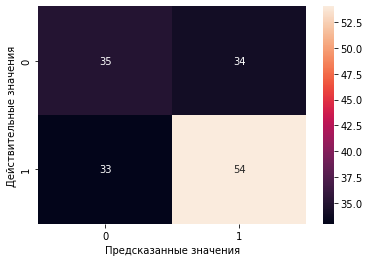

In [22]:
%matplotlib inline
 
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(Y_test, Y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

Оптимизация гиперпараметров с помощью Grid Search:

In [23]:
param_grid = {"n_neighbors": range(1, 30, 1), 
              "weights": ['uniform', 'distance'], 
              "p": [1, 2]}

In [24]:
%%time
model_knn = KNeighborsClassifier()
model_knn_opt = GridSearchCV(estimator = model_knn, param_grid = param_grid, cv = 4, verbose= 1, n_jobs = -1)

model_knn_opt.fit(X_train,Y_train)

Fitting 4 folds for each of 116 candidates, totalling 464 fits
CPU times: user 228 ms, sys: 20.6 ms, total: 249 ms
Wall time: 331 ms


GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [25]:
model_knn_opt.best_params_

{'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}

In [26]:
Y_pred = model_knn_opt.predict(X_test)

print("Classification Report:")
print(metrics.classification_report(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.68      0.59        69
           1       0.66      0.49      0.57        87

    accuracy                           0.58       156
   macro avg       0.59      0.59      0.58       156
weighted avg       0.60      0.58      0.58       156



Text(0.5, 15.0, 'Предсказанные значения')

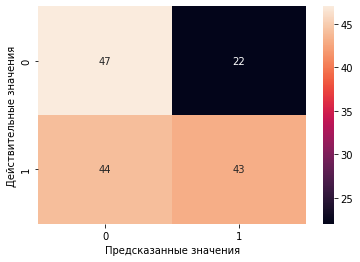

In [27]:
%matplotlib inline
 
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(Y_test, Y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')